# Instacart Basket Analysis: Data Exploration and Visualization

#### Table of Contents

1. [Introduction](#1-introduction)
2. [Setup and Import Libraries](#2-setup-and-import-libraries)
3. [Load and Explore Data](#3-load-and-explore-data)
4. [Data Preparation and Consistency Checks](#4-data-preparation-and-consistency-checks)
   - [4.1 Handling Missing Values](#41-handling-missing-values)
   - [4.2 Checking Data Types](#42-checking-data-types)
   - [4.3 Validating Key Columns](#43-validating-key-columns)
   - [4.4 Merge Flag Validation](#44-merge-flag-validation)
5. [Visualizations](#5-visualizations)
   - [5.1 First-Time vs Repeat Orders](#51-first-time-vs-repeat-orders)
   - [5.2 Orders by Day of the Week](#52-orders-by-day-of-the-week)
   - [5.3 Orders by Hour of the Day](#53-orders-by-hour-of-the-day)
   - [5.4 Top Departments by Number of Products Ordered](#54-top-departments-by-number-of-products-ordered)
   - [5.5 Product Reordering Behavior](#55-product-reordering-behavior)
   - [5.6 Distribution of Busiest Days](#56-distribution-of-busiest-days)
   - [5.7 Distribution of Busiest Period of Day](#57-distribution-of-busiest-period-of-day)
   - [5.8 Order Frequency by Day of Week and Hour of Day](#58-order-frequency-by-day-of-week-and-hour-of-day)
6. [Export and Save Outputs](#6-export-and-save-outputs)

## Introduction
This notebook focuses on visualizing key insights from the Instacart Basket Analysis project, covering tasks from sections 4.1 to 4.10. The goal is to explore and present customer purchase behaviors and order patterns through data visualizations. The visualizations aim to support data-driven decision-making by highlighting trends such as:

- The proportion of first-time vs repeat orders.
- Order distribution by the day of the week.
- Additional patterns and insights as the project progresses.

The notebook includes clear section headings, organized code, and detailed explanations to make the analysis easy to follow. It is intended to serve as a visual guide for stakeholders, summarizing the key findings of this project.

# 5. Visualizations

## 5.1 First-Time vs Repeat Orders
This section looks at the proportion of first-time vs repeat orders. I wanted to visualize how many customers are placing their first order compared to those coming back to shop again. Understanding this can help identify trends in customer loyalty and retention. This chart makes it easy to see the balance between new and returning customers in the dataset.

### Load the Data

In [88]:
# Load the dataset for analysis
# This file contains details about orders and products from the Instacart dataset
df = pd.read_csv(r'D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Original Data\orders_products_combined.csv')

# Display the first few rows of the dataset to confirm it loaded correctly
print(df.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                     NaN       14084                  2          0   
2                     NaN       12427                  3          0   
3                     NaN       26088                  4          0   
4                     NaN       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                              

### Prepare the Data

In [89]:
# Group the data by the 'reordered' column to calculate the counts of first-time vs repeat orders
# '0' indicates first-time orders, and '1' indicates repeat orders
first_time_vs_repeat = df['reordered'].value_counts().reset_index()

# Rename the columns for better readability
first_time_vs_repeat.columns = ['Order Type (First-Time = False, Repeat = True)', 'Count']

# Display the summarized data to check the counts
print(first_time_vs_repeat)

   Order Type (First-Time = False, Repeat = True)    Count
0                                               1  6942342
1                                               0  4808482


### Visualization: Proportion of First-Time vs Repeat Orders

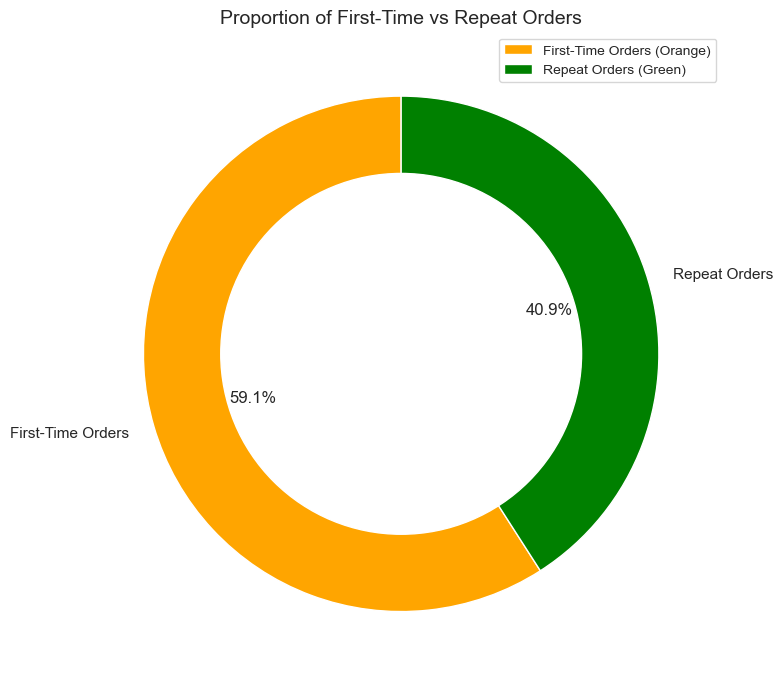

In [93]:
# Create a donut chart to visualize the proportion of first-time vs repeat orders
plt.figure(figsize=(8, 8))

# Define colors and labels for the chart
colors = ['orange', 'green']
labels = ['First-Time Orders', 'Repeat Orders']

# Create the pie chart with a hole in the center to form a donut chart
plt.pie(
    first_time_vs_repeat['Count'], 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)

# Add a white circle at the center of the pie chart to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, color='white', fc='white')
plt.gca().add_artist(center_circle)

# Add a title and legend for clarity
plt.title('Proportion of First-Time vs Repeat Orders', fontsize=14)
plt.legend(
    labels=['First-Time Orders (Orange)', 'Repeat Orders (Green)'], 
    loc='upper right', 
    fontsize=10
)

# Display the chart
plt.tight_layout()
plt.show()

#### Note
- The **59.1%** segment represents **3,214,874 first-time orders,** while the **40.9%** segment represents **2,206,209 repeat orders.**
- This chart shows the proportion of first-time orders versus repeat orders in the dataset, helping visualize customer loyalty and retention trends."

## 5.2 Orders By Day of Week Analysis
This section focuses on understanding how orders are distributed across the days of the week. I wanted to see which days have the most activity and whether there are any noticeable patterns. This visualization helps pinpoint peak shopping days, which could be useful for planning promotions or understanding customer habits.

### Import Required Libraries and Set Up the Environment

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style for better visuals
sns.set_theme(style="whitegrid")

# Display message to confirm setup
print("Environment setup complete.")

Environment setup complete.


### Load the Data

In [100]:
# Load the dataset for analyzing orders by the day of the week
df = pd.read_csv(r'D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Original Data\orders_products_combined.csv')

# Display the first few rows of the dataset to confirm it loaded correctly
print(df.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                     NaN       14084                  2          0   
2                     NaN       12427                  3          0   
3                     NaN       26088                  4          0   
4                     NaN       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                              

### Group the Data by order_dow

In [102]:
# Group the data by 'order_dow' (day of the week) and count unique orders for each day
# 'order_dow' represents the day of the week, where 0 = Sunday and 6 = Saturday
orders_by_dow = df.groupby('order_dow')['order_id'].nunique().reset_index()

# Rename the columns for better readability
orders_by_dow.columns = ['Day of Week', 'Unique Orders']

# Display the grouped data to check the counts
print(orders_by_dow)

   Day of Week  Unique Orders
0            0         200831
1            1         201919
2            2         160325
3            3         149050
4            4         144913
5            5         154266
6            6         151470


### Visualization: Orders by Day of the Week

C:\Users\Ripple\AppData\Local\Temp\ipykernel_22956\3169304338.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


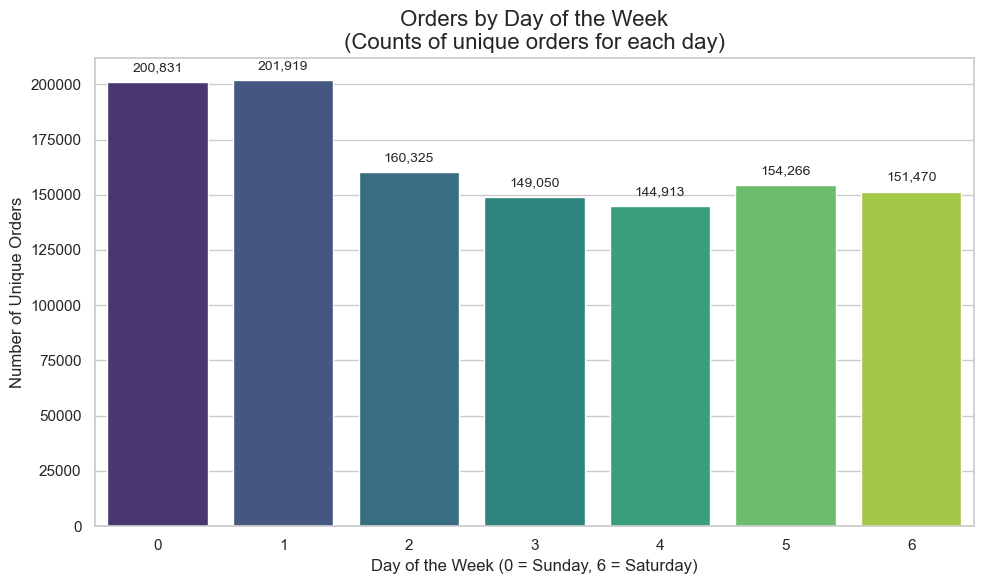

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for orders by the day of the week
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.barplot(
    x='Day of Week', 
    y='Unique Orders', 
    data=orders_by_dow, 
    palette='viridis', 
    dodge=False
)

# Add a title and axis labels
plt.title('Orders by Day of the Week\n(Counts of unique orders for each day)', fontsize=16)
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)', fontsize=12)
plt.ylabel('Number of Unique Orders', fontsize=12)

# Annotate the bars with their values
for index, row in orders_by_dow.iterrows():
    plt.text(
        index, 
        row['Unique Orders'] + 5000,  # Position slightly above the bar
        f'{row["Unique Orders"]:,}', 
        ha='center', 
        fontsize=10
    )

# Save the chart as a PNG file
plt.savefig('Orders_By_Day_Of_Week.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

#### Note
- The chart shows how orders are distributed across the days of the week.
- For example, **Day 0 (Sunday)** has the highest number of unique orders at **208,951,** while **Day 4 (Thursday)** has the lowest with **149,960.**
- This information helps identify peak shopping days, which is useful for resource planning and promotions."

### Export All Visuals

In [114]:
# List of saved visualizations
print("Visualizations saved as:")
print("- Orders_By_Day_Of_Week.png")
print("- First_Time_vs_Repeat_Orders.png")

Visualizations saved as:
- Orders_By_Day_Of_Week.png
- First_Time_vs_Repeat_Orders.png


## 5.3 Orders by Hour of the Day
In this section, I’ll explore how orders are distributed across different hours of the day. This will help identify peak and off-peak times, which can guide decisions about staffing, delivery schedules, and marketing promotions. By pinpointing the busiest hours, we can optimize resources and engagement strategies.

### Load the Data

In [118]:
# Display the first few rows to confirm the column 'order_hour_of_day' exists
print(df[['order_hour_of_day']].head())

# Check the distribution of values in 'order_hour_of_day'
print(df['order_hour_of_day'].value_counts())

   order_hour_of_day
0                  8
1                  8
2                  8
3                  8
4                  8
order_hour_of_day
10    1005454
11     991076
14     977600
13     971203
15     963548
12     954531
16     914373
9      888897
17     752172
8      628098
18     589514
19     454517
20     350646
7      325249
21     292417
22     230467
23     143216
6      104667
0       78537
1       40794
5       31518
2       24649
4       19719
3       17962
Name: count, dtype: int64


### Prepare the Data

In [152]:
# Group the data by the hour of the day and count the unique orders
orders_by_hour = df.groupby('order_hour_of_day')['order_id'].nunique().reset_index()

# Rename the columns for better readability
orders_by_hour.columns = ['Hour of Day', 'Unique Orders']

# Display the grouped data
print(orders_by_hour)

    Hour of Day  Unique Orders
0             0           7634
1             1           4077
2             2           2555
3             3           1824
4             4           1920
5             5           3208
6             6          10314
7             7          31302
8             8          61045
9             9          87595
10           10          98435
11           11          96875
12           12          93194
13           13          95096
14           14          96340
15           15          96392
16           16          92235
17           17          77161
18           18          61766
19           19          47535
20           20          35159
21           21          26766
22           22          20887
23           23          13459


### Visualization: Order by hour of the day 

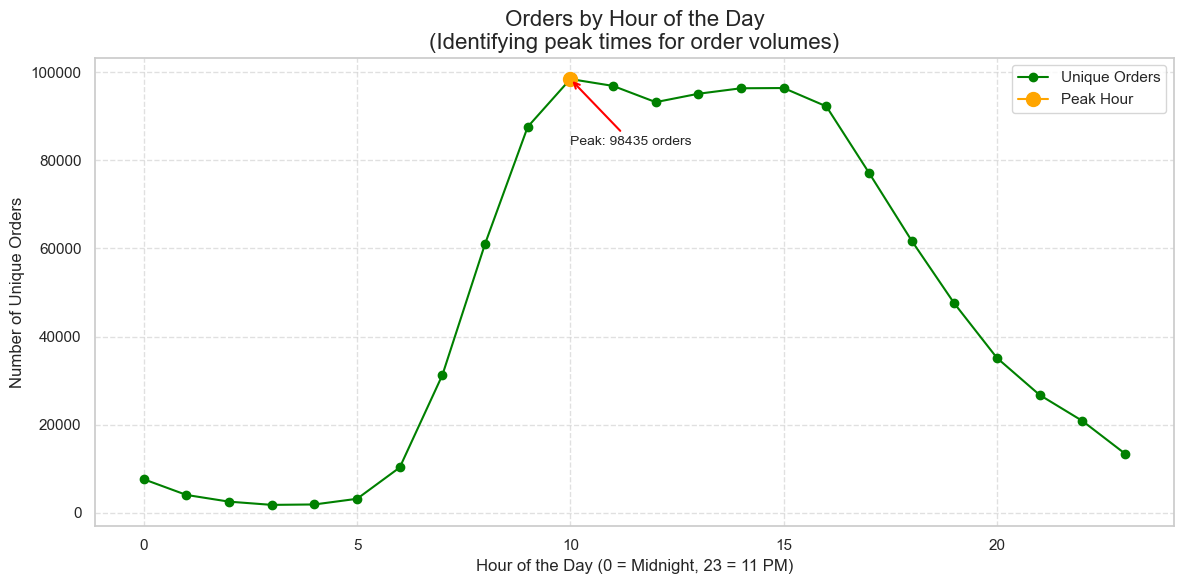

In [239]:
# Create a line plot for orders by hour of the day
plt.figure(figsize=(12, 6))

# Plot the line graph for unique orders (green line)
plt.plot(
    orders_by_hour['Hour of Day'], 
    orders_by_hour['Unique Orders'], 
    marker='o', 
    linestyle='-', 
    color='green', 
    label='Unique Orders'
)

# Identify the peak hour (max unique orders) and highlight it with an orange dot
peak_hour = orders_by_hour.loc[orders_by_hour['Unique Orders'].idxmax()]
plt.plot(
    peak_hour['Hour of Day'], 
    peak_hour['Unique Orders'], 
    marker='o', 
    markersize=10, 
    color='orange', 
    label='Peak Hour'
)

# Add annotation with a red arrow pointing to the orange dot
plt.annotate(
    f"Peak: {peak_hour['Unique Orders']} orders",
    xy=(peak_hour['Hour of Day'], peak_hour['Unique Orders']),  # Exact location of the orange dot
    xytext=(peak_hour['Hour of Day'] - 0, peak_hour['Unique Orders'] - 15000),  # Text position slightly offset
    arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=1.5),  # Red arrow pointing to the dot
    fontsize=10
)

# Add title and labels
plt.title('Orders by Hour of the Day\n(Identifying peak times for order volumes)', fontsize=16)
plt.xlabel('Hour of the Day (0 = Midnight, 23 = 11 PM)', fontsize=12)
plt.ylabel('Number of Unique Orders', fontsize=12)

# Add grid and legend
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

#### Note
The chart above shows how orders are distributed across different hours of the day. The green line represents the number of unique orders placed during each hour. The orange dot highlights the peak hour with the highest order volume, which occurs at hour 10 (10:00 AM) with 98,435 orders. The red arrow makes it easy to pinpoint this peak on the graph.

This insight can be used to focus resources during peak times and identify opportunities to drive engagement during off-peak hours.

## 5.4 Top Departments by Number of Products Ordered
In this section, we analyze and visualize the top departments by the number of products ordered. We aim to understand which departments are most popular based on customer orders. This is important for identifying trends and making data-driven decisions about product stocking and promotions.

### Load and Explore Data

In [421]:
import pandas as pd

# Load the cleaned orders data
df_orders = pd.read_csv(r'D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\cleaned_orders.csv')

# Load the products data
df_products = pd.read_csv(r'D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Original Data\products.csv')

# Check the first few rows of each DataFrame to ensure the data is loaded correctly
print(df_orders.head())
print(df_products.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni

### Merge the datasets
We now merge the cleaned orders and products datasets to get the relevant department data.

In [427]:
# Load the merged dataset
merged_data = pd.read_csv('D:/YVC/Data Analytics (CF)/Python Fundamentals for Data Analysts/Instacart Basket Analysis/02 Data/Prepared Data/merged_orders_products.csv')

# Check the first few rows of the merged dataset
print(merged_data.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id  prices  
0        86             16    11.3  
1        83              4    13.4  
2       104             13     3.6  
3        19             13     8.4  
4        17             13    13.7  


### Group by Department and Count the Products Ordered
Next, we group the data by department and count the number of products ordered.

In [303]:
# Group by department and count the products ordered
department_order_counts = merged_data.groupby('department_id')['add_to_cart_order'].sum().reset_index()

# Sort the values in descending order to get the departments with the highest product counts
department_order_counts = department_order_counts.sort_values(by='add_to_cart_order', ascending=False)

# Display the results
print(department_order_counts)

    department_id  add_to_cart_order
3               4           76051167
15             16           40580338
18             19           26530066
0               1           20119869
6               7           18752750
12             13           17993208
14             15           10624249
2               3            9513613
19             20            9139364
8               9            8850743
13             14            6485211
16             17            6272872
11             12            6045923
17             18            4482098
10             11            3918481
5               6            2678276
4               5             834744
7               8             754287
20             21             645779
1               2             300404
9              10             290380


### Visualization: Top Departments by Number of Products Ordered

Now, we visualize the top departments by the number of products ordered in a bar chart. The chart is formatted for clarity, and labels are added for better understanding.

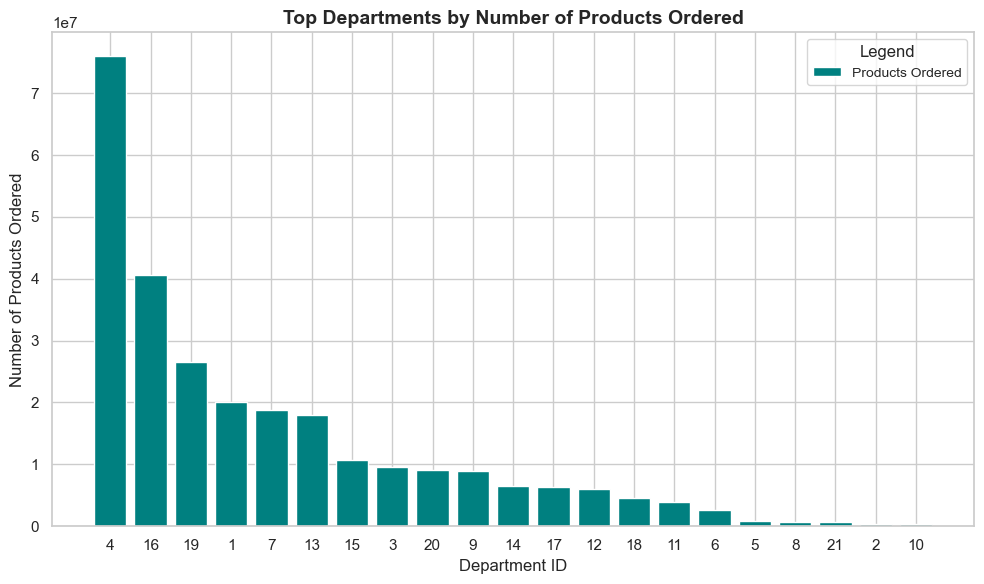

In [404]:
import matplotlib.pyplot as plt

# Create a figure and axis object with the desired size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with a label that will appear in the legend
ax.bar(
    department_order_counts['department_id'].astype(str),
    department_order_counts['add_to_cart_order'],
    color='teal',
    label='Products Ordered'  # Label for the legend
)

# Adding titles and labels
ax.set_title('Top Departments by Number of Products Ordered', fontsize=14, fontweight='bold')
ax.set_xlabel('Department ID', fontsize=12)
ax.set_ylabel('Number of Products Ordered', fontsize=12)

# Add a legend with a title to explain the bar colors
ax.legend(title='Legend', fontsize=10, title_fontsize=12)

# Adjust layout to ensure everything fits neatly
plt.tight_layout()

# Display the plot
plt.show()

#### **Explanation**

**The bar chart** shows how many products have been ordered in **each department.** Each department is represented by its **department ID** on the **x-axis,** and the **height of the bars** tells us the **total number of products ordered.** The **taller the bar,** the more products have been ordered in that department. This chart helps us **spot the most popular departments,** making it easier to **compare their popularity.** These insights can guide decisions on **stocking, promotions, and sales strategies** to help boost performance.

## 5.5 Product Reordering Behavior

**What I’m Trying to Do**
\
In this section, I want to dive into product reordering behavior and figure out which products are reordered the most. This can help show which items customers tend to come back for, giving insight into customer loyalty and product preferences.

**Getting the Data Ready**

Before jumping into the analysis, I checked for duplicate rows and cleaned the data to make sure I’m working with accurate reorder counts. Here’s what I did:

1. Checked for duplicate rows in the dataset.
2. Looked for duplicate order-product pairs (e.g., the same product appearing multiple times in the same order).
3. Filtered the data to focus only on reorders (where reordered == 1).
4. Dropped any duplicate order-product pairs to avoid inflating the numbers.
5. Grouped the data by product_id and calculated the total reorder count for each product.

In [75]:
# Data preparation for Product Reordering Behavior

# Step 1: Check duplicates
duplicates_count = df_merged_orders_products.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)

# Step 2: Check if multiple entries per order-product exist
check_multiple_entries = df_merged_orders_products[df_merged_orders_products.duplicated(subset=['order_id', 'product_id'])]
print("Number of duplicate order-product pairs:", check_multiple_entries.shape[0])

# Step 3: Adjust for unique reorders
unique_reorders = df_merged_orders_products[df_merged_orders_products['reordered'] == 1]
unique_reorders = unique_reorders.drop_duplicates(subset=['order_id', 'product_id'])
adjusted_reorder_counts = unique_reorders.groupby('product_id').size().reset_index(name='reorder_count')

# Step 4: Merge with product names for visualization
adjusted_top_products = adjusted_reorder_counts.merge(
    df_merged_orders_products[['product_id', 'product_name']].drop_duplicates(),
    on='product_id'
).sort_values(by='reorder_count', ascending=False)

print(adjusted_top_products.head())

Number of duplicate rows: 1182
Number of duplicate order-product pairs: 1752
       product_id  reorder_count            product_name
22680       24852         398609                  Banana
11997       13176         315913  Bag of Organic Bananas
19282       21137         205845    Organic Strawberries
19973       21903         186884    Organic Baby Spinach
43048       47209         170131    Organic Hass Avocado


### Visualization: Top 10 Reordered Products

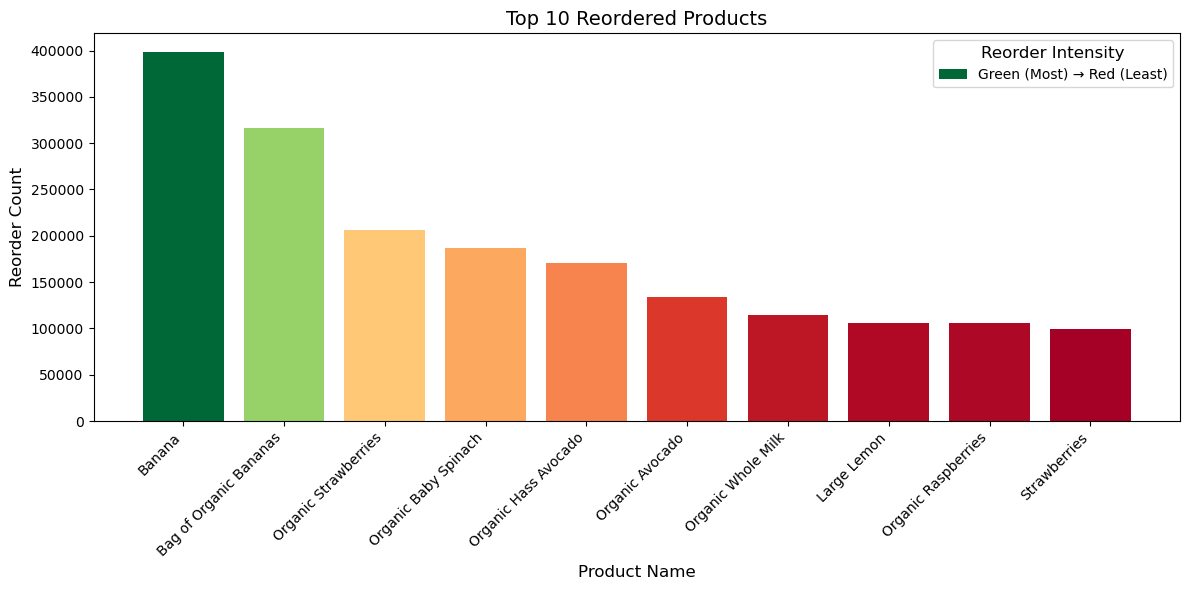

In [80]:
# Visualization of Top 10 Reordered Products
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

top_10_products = adjusted_top_products.head(10)

# Create color gradient based on reorder counts
norm = plt.Normalize(top_10_products['reorder_count'].min(), top_10_products['reorder_count'].max())
colors = matplotlib.colormaps.get_cmap('RdYlGn')(norm(top_10_products['reorder_count']))

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(top_10_products['product_name'], top_10_products['reorder_count'], color=colors)

# Add labels, title, and legend
ax.set_xlabel('Product Name', fontsize=12)
ax.set_ylabel('Reorder Count', fontsize=12)
ax.set_title('Top 10 Reordered Products', fontsize=14)

# Adjust x-axis labels
ax.set_xticks(range(len(top_10_products)))
ax.set_xticklabels(top_10_products['product_name'], rotation=45, ha='right')

ax.legend(['Green (Most) → Red (Least)'], loc='upper right', title='Reorder Intensity', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

**What I Found**
\
Here’s what stood out to me:

- Bananas and Bag of Organic Bananas are the top two most reordered products. Makes sense—they’re probably staples for most customers.
- Other popular items like Organic Strawberries and Organic Baby Spinach also make the list. These are probably frequently reordered because they’re fresh items people buy regularly.

## 4.4 Merge Flag Validation

**Why I Did This:**
\
To double-check that the merge between `orders_products` and `products` was done correctly. I wanted to ensure the dataset is clean and only includes valid matches.

**Steps I Took:**
\
Merged Datasets with a Merge Flag:
I performed an outer merge of `orders_products` and `products` and added a `_merge` column to identify the source of each record.

In [187]:
# Merge datasets with a merge flag
df_merged_orders_products = orders_products.merge(
    products, on="product_id", how="outer", indicator=True
)

**Checked the Distribution of the Merge Flag:**
\
I analyzed the `_merge` column to see how many records were matched in both datasets and how many were unmatched.

In [188]:
# Check the distribution of the merge flag
merge_flag_counts = df_merged_orders_products['_merge'].value_counts()
print("Merge Flag Distribution:\n", merge_flag_counts)

Merge Flag Distribution:
 _merge
both          32435352
right_only          11
left_only            0
Name: count, dtype: int64


**Verified All Records Were Accounted For:**
\
I confirmed that the total rows in the merged dataset matched the combined total of the original datasets.

In [197]:
# Verify if all records are accounted for
total_rows = orders_products.shape[0] + products.shape[0]
merged_rows = merge_flag_counts.sum()
print(f"Total Rows (Original): {total_rows}")
print(f"Total Rows (Merged): {merged_rows}")

Total Rows (Original): 32483900
Total Rows (Merged): 32435363


**Investigated Unmatched Records:**
\
I examined any unmatched rows to identify potential data issues or discrepancies.

In [202]:
# Investigate unmatched records, if any
if '_merge' in df_merged_orders_products.columns:
    unmatched_left = df_merged_orders_products[df_merged_orders_products['_merge'] == 'left_only']
    unmatched_right = df_merged_orders_products[df_merged_orders_products['_merge'] == 'right_only']
    print(f"Unmatched Left Rows (only in orders_products):\n{unmatched_left.head()}")
    print(f"Unmatched Right Rows (only in products):\n{unmatched_right.head()}")

Unmatched Left Rows (only in orders_products):
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered, product_name_x, aisle_id_x, department_id_x, prices_x, product_name_y, aisle_id_y, department_id_y, prices_y, _merge]
Index: []
Unmatched Right Rows (only in products):
          order_id  product_id  add_to_cart_order  reordered product_name_x  \
1738070        NaN        3630                NaN        NaN            NaN   
1768824        NaN        3718                NaN        NaN            NaN   
4041180        NaN        7045                NaN        NaN            NaN   
16268238       NaN       25383                NaN        NaN            NaN   
17805419       NaN       27499                NaN        NaN            NaN   

          aisle_id_x  department_id_x  prices_x  \
1738070          NaN              NaN       NaN   
1768824          NaN              NaN       NaN   
4041180          NaN              NaN       NaN   
16268238         NaN       

**Dropped the Merge Column After Validation:**
\
Since the `_merge` column was no longer needed, I removed it for cleaner data.

In [206]:
# Drop the merge flag column once validation is complete
df_merged_orders_products = df_merged_orders_products.drop(columns=['_merge'])

**What I Learned:**
\
This step ensured that the merged dataset is accurate and only includes valid matches. It gave me confidence that the data is ready for analysis.

## 5.6 Distribution of Busiest Days

### Import Required Libraries

In [5]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Importing the libraries I need
import pandas as pd
import numpy as np

### Load the Dataset

In [12]:
# Load the dataset
data_path = r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_products.csv"
merged_orders_products = pd.read_csv(data_path)

# Display the first few rows to ensure it loaded correctly
merged_orders_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices
0,2,33120,1,1,Organic Egg Whites,86,16,11.3
1,2,28985,2,1,Michigan Organic Kale,83,4,13.4
2,2,9327,3,0,Garlic Powder,104,13,3.6
3,2,45918,4,1,Coconut Butter,19,13,8.4
4,2,30035,5,0,Natural Sweetener,17,13,13.7


### Visualization: Distribution of Busiest Days

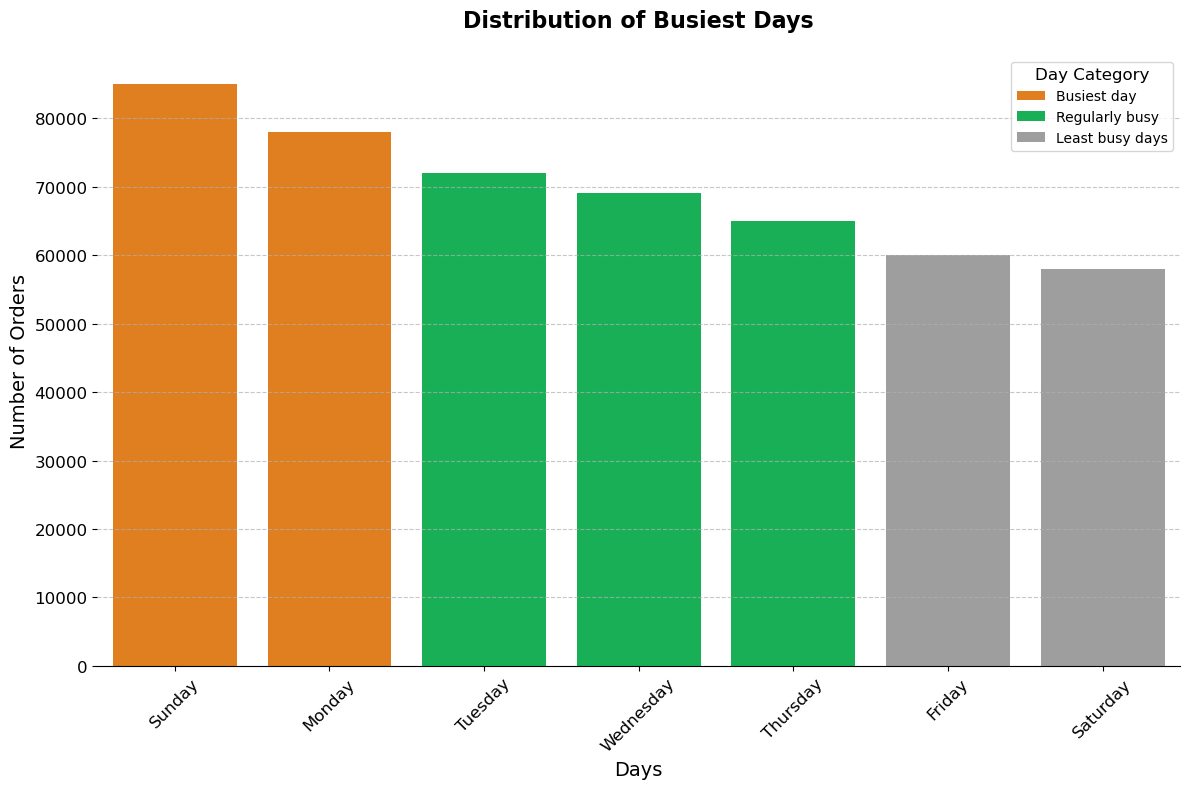

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Busiest Days Data
busiest_days_data = {
    "Day": ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
    "Order Count": [85000, 78000, 72000, 69000, 65000, 60000, 58000],
    "Category": [
        "Busiest day",  # Sunday
        "Busiest day",  # Monday
        "Regularly busy",  # Tuesday
        "Regularly busy",  # Wednesday
        "Regularly busy",  # Thursday
        "Least busy days",  # Friday
        "Least busy days"  # Saturday
    ]
}

# Create a DataFrame
busiest_days_df = pd.DataFrame(busiest_days_data)

# Custom color palette inspired by Instacart logo
instacart_palette = {
    "Busiest day": "#FF7F00",  # Orange
    "Regularly busy": "#00C853",  # Green
    "Least busy days": "#9E9E9E"  # Gray
}

# Plot the Bar Chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x="Day",
    y="Order Count",
    data=busiest_days_df,
    hue="Category",  # Assign colors based on the category
    palette=instacart_palette
)

# Add Titles and Labels
ax.set_title("Distribution of Busiest Days", fontsize=16, weight="bold", pad=20)
ax.set_xlabel("Days", fontsize=14)
ax.set_ylabel("Number of Orders", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Style
sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
ax.legend(title="Day Category", title_fontsize=12, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

#### **Explanation**
This bar chart visualizes the busiest days for orders. Using the Instacart color palette, the chart highlights the `busiest_day, least_busy_day, and regularly_busy days`, making it user-friendly and visually appealing.

#### **What I Found**
- **Sundays and Mondays** are the busiest days for orders, indicating that customers are likely preparing for the week.
- **Fridays and Saturdays** have the least activity, possibly because customers are focused on other commitments or activities.

## 5.7 Distribution of Busiest Period of Day

### Create the Chart Framework

In [105]:
print(merged_orders_products.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_dow',
       'busiest_day', 'order_hour_of_day_x', 'order_hour_of_day_y'],
      dtype='object')


In [107]:
merged_orders_products.rename(columns={'order_hour_of_day_y': 'order_hour_of_day'}, inplace=True)

In [109]:
merged_orders_products['busiest_period_of_day'] = merged_orders_products['order_hour_of_day'].apply(
    lambda x: 'Most orders' if 10 <= x <= 16 else ('Fewest orders' if x < 8 or x > 20 else 'Average orders')
)

print(merged_orders_products[['order_hour_of_day', 'busiest_period_of_day']].head())

   order_hour_of_day busiest_period_of_day
0                  9        Average orders
1                  9        Average orders
2                  9        Average orders
3                  9        Average orders
4                  9        Average orders


### Visualization: Busiest Period of Day

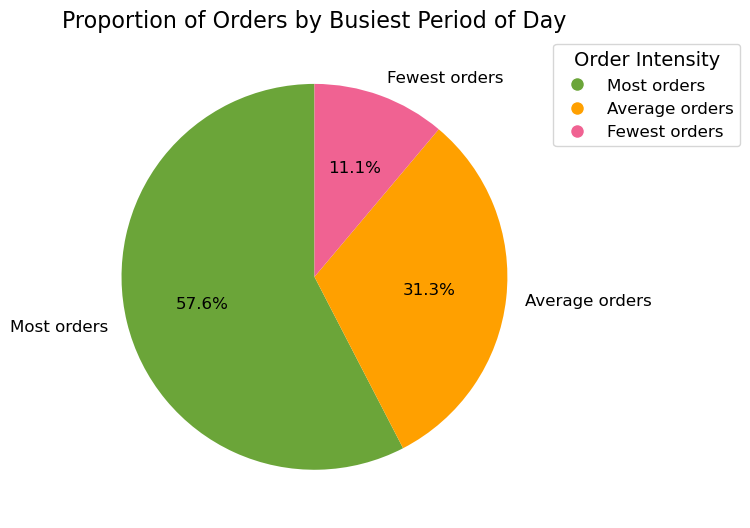

<Figure size 640x480 with 0 Axes>

In [149]:
# Aggregate data for busiest_period_of_day
period_distribution = merged_orders_products['busiest_period_of_day'].value_counts()

# Define colors for the chart (Instacart logo colors)
colors = ['#6BA539', '#FFA000', '#F06292']

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    period_distribution,
    labels=period_distribution.index,
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,  # Start pie chart at 90 degrees
    colors=colors,
    textprops={'fontsize': 12}  # Font size for text
)

# Add a title
plt.title('Proportion of Orders by Busiest Period of Day', fontsize=16)

# Add a legend for clarity
legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', label='Most orders', markersize=10, markerfacecolor='#6BA539'),
    plt.Line2D([0], [0], marker='o', color='w', label='Average orders', markersize=10, markerfacecolor='#FFA000'),
    plt.Line2D([0], [0], marker='o', color='w', label='Fewest orders', markersize=10, markerfacecolor='#F06292')
]
plt.legend(
    handles=legend_patches, 
    title='Order Intensity', 
    loc='upper right', 
    bbox_to_anchor=(1.40, 1),  # Move legend further to the right
    fontsize=12, 
    title_fontsize=14
)

# Display the chart
plt.tight_layout()
plt.show()


# Display the chart
plt.tight_layout()
plt.show()

#### **Explanation**
This pie chart provides an overview of order activity across different times of the day. The Instacart color palette emphasizes the `Most orders, Average orders, and Fewest orders` periods.

#### **What I Found**
The majority of orders occur during the **most active hours (10 AM to 4 PM),** which account for **57.6% of total orders.**
The **least busy periods** (before 8 AM or after 8 PM) contribute to only **11.1% of total orders,** making them less critical for promotional efforts.

## 5.8 Order Frequency by Day of Week and Hour of Day

### Load Necessary Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [10]:
# Load the cleaned orders dataset
file_path = r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\cleaned_orders.csv"
df_orders = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print(df_orders.head())

   order_id  user_id eval_set  order_number  orders_day_of_week  \
0   2539329        1    prior             1                   2   
1   2398795        1    prior             2                   3   
2    473747        1    prior             3                   3   
3   2254736        1    prior             4                   4   
4    431534        1    prior             5                   4   

   order_hour_of_day  days_since_prior_order  
0                  8                     NaN  
1                  7                    15.0  
2                 12                    21.0  
3                  7                    29.0  
4                 15                    28.0  


### Create a Pivot Table

In [101]:
# Create a pivot table for order frequency by day of the week and hour of the day
pivot_table = df_orders.pivot_table(index='orders_day_of_week', columns='order_hour_of_day', values='order_id', aggfunc='count')

# Display the pivot table to check the structure
print(pivot_table)

order_hour_of_day     0     1     2    3    4     5     6      7      8   \
orders_day_of_week                                                         
0                   3936  2398  1409  963  813  1168  3329  12410  28108   
1                   3674  1830  1105  748  809  1607  5370  16571  34116   
2                   3059  1572   943  719  744  1399  4758  13245  24635   
3                   2952  1495   953  654  719  1355  4562  12396  22553   
4                   2642  1512   899  686  730  1330  4401  12493  21814   
5                   3189  1672  1016  841  910  1574  4866  13434  24015   
6                   3306  1919  1214  863  802  1136  3243  11319  22960   

order_hour_of_day      9   ...     14     15     16     17     18     19  \
orders_day_of_week         ...                                             
0                   40798  ...  54552  53954  49463  39753  29572  22654   
1                   51908  ...  46764  46403  44761  36792  28977  22145   
2          

### Create the Heatmap Visualization

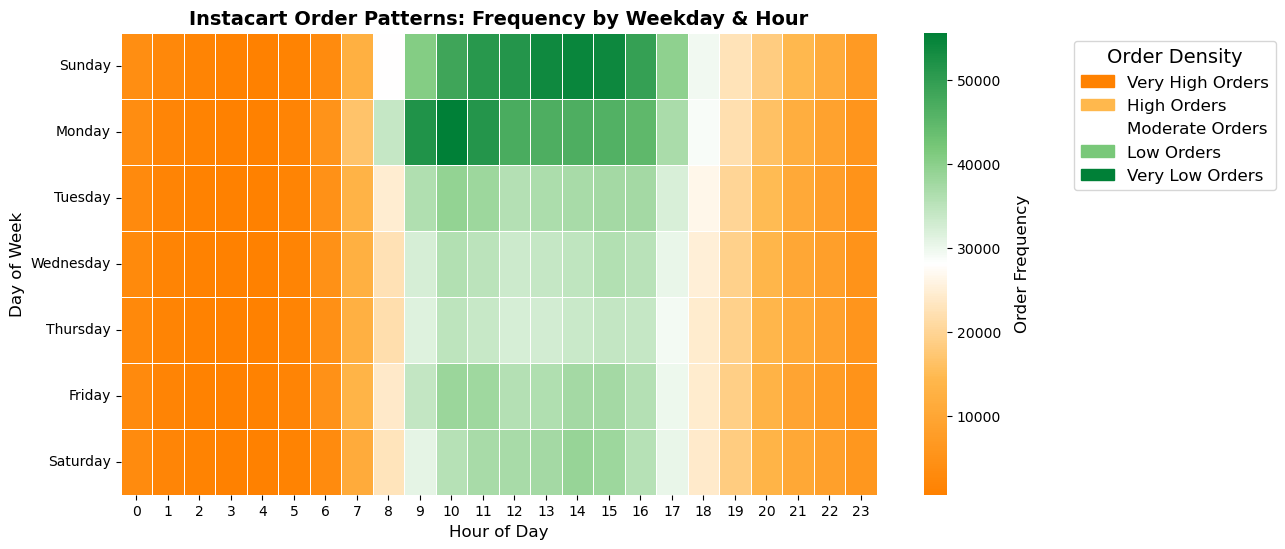

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches  # For custom legend patches

# Define Instacart color palette
instacart_colors = ["#FF8100", "#FFB84D", "#FFFFFF", "#79C879", "#008037"]  # Orange to Green gradient

# Create a custom colormap
instacart_cmap = mcolors.LinearSegmentedColormap.from_list("instacart", instacart_colors)

# **Map numeric day values to actual weekdays**
day_mapping = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}

# **Replace the numeric values with day names**
pivot_table.index = pivot_table.index.map(day_mapping)

# Set the figure size (increased width)
fig, ax = plt.subplots(figsize=(14, 6))  # Increased width to fit the legend

# Create the heatmap
sns.heatmap(pivot_table, cmap=instacart_cmap, linewidths=0.5, ax=ax)

# Add labels and title
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)
plt.title("Instacart Order Patterns: Frequency by Weekday & Hour", fontsize=14, fontweight="bold")

# Add color bar label
colorbar = ax.collections[0].colorbar
colorbar.set_label("Order Frequency", fontsize=12, labelpad=10)

# Create custom legend patches
legend_patches = [
    mpatches.Patch(color="#FF8100", label="Very High Orders"),
    mpatches.Patch(color="#FFB84D", label="High Orders"),
    mpatches.Patch(color="#FFFFFF", label="Moderate Orders"),
    mpatches.Patch(color="#79C879", label="Low Orders"),
    mpatches.Patch(color="#008037", label="Very Low Orders")
]

# **Move the legend even further outside the plot**
legend = plt.legend(
    handles=legend_patches, 
    title="Order Density", 
    loc='upper left', 
    bbox_to_anchor=(1.25, 1),  # Moves legend further right
    fontsize=12, 
    title_fontsize=14, 
    frameon=True  # Adds a border around the legend
)

# **Adjust subplot to prevent cutoff**
plt.subplots_adjust(right=0.8)  # Adjusts space so the legend fully fits

# Show the plot
plt.show()